IMORTING ALL THE REQUIRED PACKAGES

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [153]:
wine=pd.read_csv("winequality-red.csv",sep=',')
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [155]:
wine.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [120]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [121]:
wine.isnull().sum() #is there any null value


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [123]:
components=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [124]:
# # drop the missing values - dropna()
# wine = wine.dropna(subset=components)
# wine.head()

In [125]:
# # Feature and target selection - Feature - independent variable and Target dependent variable
# X = wine[components]
# y = wine[["quality"]]

PREPROCESSING DATA

In [126]:
bins=(2,6.5,8)
group_names=['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=bins,labels=group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [127]:
label_quality=LabelEncoder()


In [128]:
wine['quality']=label_quality.fit_transform(wine['quality'])


In [129]:
wine.head(20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [130]:
vl=wine['quality'].value_counts()
vl

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

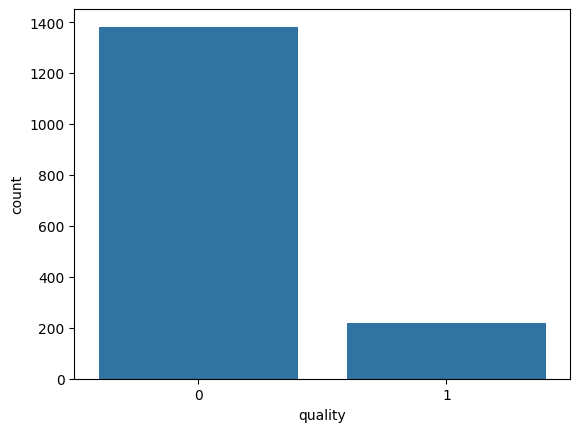

In [131]:
sns.barplot(wine['quality'].value_counts())

NOW SEPERATE THE DATASET AS RESPONSE VARIABLE AND FEATURE VARIABLES

In [132]:
X=wine.drop('quality',axis=1)
y=wine['quality']

TRAIN AND TEST SPLITING DATA

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Applying a standard scaling to get optimized result

In [134]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [135]:
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

Random forest classifier

In [136]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [137]:
pred_rfc=rfc.predict(X_test)

Lets see how our model performing

In [138]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       273
           1       0.67      0.30      0.41        47

    accuracy                           0.88       320
   macro avg       0.78      0.64      0.67       320
weighted avg       0.86      0.88      0.85       320



In [139]:
print(confusion_matrix(y_test,pred_rfc))

[[266   7]
 [ 33  14]]


SVM Classifier

In [140]:
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train,y_train)


SVC()

In [141]:
pred_clf=clf.predict(X_test)
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


Neural Network

In [142]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=2000)
mlpc.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=2000)

In [143]:
pred_mlpc=mlpc.predict(X_test)
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       273
           1       0.58      0.47      0.52        47

    accuracy                           0.87       320
   macro avg       0.75      0.70      0.72       320
weighted avg       0.86      0.87      0.87       320

[[257  16]
 [ 25  22]]


In [144]:
from sklearn.metrics import accuracy_score

In [145]:
cm=accuracy_score(y_test,pred_rfc)
print(cm)
cm1=accuracy_score(y_test,pred_clf)
print(cm1)
cm2=accuracy_score(y_test,pred_mlpc)
print(cm2)


0.875
0.875
0.871875


In [157]:
X_train =[[7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0]]
X_train=sc.transform(X_train)
ynew=rfc.predict(X_train)
print(ynew)
ynew1=clf.predict(X_train)
print(ynew1)
ynew2=mlpc.predict(X_train)
print(ynew2)



[0]
[0]
[1]


c:\Users\goura\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [147]:

import joblib

joblib.dump(rfc,'rfc_model.pkl')
joblib.dump(clf,'clf_model.pkl')
joblib.dump(mlpc,'mlpc_model.pkl')

# joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!
